<a href="https://colab.research.google.com/github/kdwang1808/2020-MCM/blob/master/Para_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)
print("Size of training set:{} size of testing set:{}".format(X_train.shape[0],X_test.shape[0]))

####   grid search start
best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)#对于每种参数可能的组合，进行一次训练；
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        if score > best_score:#找到表现最好的参数
            best_score = score
            best_parameters = {'gamma':gamma,'C':C}
####   grid search end

print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

Size of training set:112 size of testing set:38
Best score:0.97
Best parameters:{'gamma': 0.001, 'C': 100}


In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 134448 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.17-0ubuntu2~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.17-0ubuntu2~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.17-0ubuntu2~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
import os
import sys
os.chdir('drive/Colab Notebooks/2020MCM_PC')

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [0]:
hair = pd.read_csv('hair_clean.csv')
micro = pd.read_csv('micro_clean.csv')
baby = pd.read_csv('baby_clean.csv')

In [144]:
hair.tail()

,yy,mm,dd,product_parent,star_rating,helpful_votes,total_votes,clean
9696,2015,8,31,99,5,0,0,five stars styling hair style
9697,2015,8,31,329,5,0,0,five stars excellent dryer
9698,2015,8,31,72,3,1,1,everything okay found everything goes well exc...
9699,2015,8,31,208,5,0,0,five stars perfect
9700,2015,8,31,269,5,0,1,nice hairdryer works well really like hairdrye...


In [145]:
hair_maxvote = pd.DataFrame(hair.groupby('product_parent')['total_votes'].max())
hair_maxvote['product_parent'] = hair_maxvote.index
hair_maxvote.index.name = None
hair_maxvote.rename(columns={'total_votes':'max_votes'}, inplace = True)
hair = pd.merge(hair, hair_maxvote, on='product_parent')
hair["score_weight"] = (hair["helpful_votes"]+1)/(1+(hair["max_votes"]))
hair.head(8)

,yy,mm,dd,product_parent,star_rating,helpful_votes,total_votes,clean,max_votes,score_weight
0,2008,1,1,201,5,7,8,simply best blow dryer market best standard bl...,8,0.888889
1,2008,7,17,201,5,6,6,power packed dryer dryer gets job done want dr...,8,0.777778
2,2008,8,25,201,5,1,1,great product arrived promptly packaged well w...,8,0.222222
3,2009,8,16,201,5,0,0,finally arrived hair drier described price rea...,8,0.111111
4,2010,2,7,201,5,0,0,beats heck rotary hair dryers bought wife long...,8,0.111111
5,2010,10,2,201,4,1,2,simple solid excellent hair dryer bought old c...,8,0.222222
6,2011,4,13,201,5,1,1,awesome first saw product hairdresser salon bl...,8,0.222222
7,2011,4,23,201,5,0,0,best hair dryer ever hair dryer shaved 1 1 2 h...,8,0.111111


In [146]:
micro_maxvote = pd.DataFrame(micro.groupby('product_parent')['total_votes'].max())
micro_maxvote['product_parent'] = micro_maxvote.index
micro_maxvote.index.name = None
micro_maxvote.rename(columns={'total_votes':'max_votes'}, inplace = True)
micro = pd.merge(micro, micro_maxvote, on='product_parent')
micro["score_weight"] = (micro["helpful_votes"]+1)/(1+(micro["max_votes"]))
micro.head(8)

,yy,mm,dd,product_parent,star_rating,helpful_votes,total_votes,clean,max_votes,score_weight
0,2008,2,22,15,5,7,7,sharp range convection microwave oven surprise...,8,0.888889
1,2010,8,25,15,5,5,6,maybe best micro convection built owning previ...,8,0.666667
2,2010,12,12,15,5,0,0,excellent product great price owner product se...,8,0.111111
3,2012,6,22,15,5,2,2,sharp convection microwave wife wanted item co...,8,0.333333
4,2012,8,21,15,5,2,2,thanks sharp thanks amazon bought microwave ki...,8,0.333333
5,2012,12,30,15,4,6,6,best available old sharp 34 range 34 started d...,8,0.777778
6,2013,3,11,15,3,3,3,updated sharp range microwave fits perfectly p...,8,0.444444
7,2013,7,6,15,5,2,2,sharp r 1874 1 1 cubic foot 850 watt range con...,8,0.333333


In [147]:
baby_maxvote = pd.DataFrame(baby.groupby('product_parent')['total_votes'].max())
baby_maxvote['product_parent'] = baby_maxvote.index
baby_maxvote.index.name = None
baby_maxvote.rename(columns={'total_votes':'max_votes'}, inplace = True)
baby = pd.merge(baby, baby_maxvote, on='product_parent')
baby["score_weight"] = (baby["helpful_votes"]+1)/(1+(baby["max_votes"]))
baby.head(8)

,yy,mm,dd,product_parent,star_rating,helpful_votes,total_votes,clean,max_votes,score_weight
0,2008,2,15,4383,5,1,2,womb sounds bear excellent newborn purchased w...,5,0.333333
1,2008,9,22,4383,5,2,2,incredible two sons took heartbeat bear hospit...,5,0.500000
2,2009,2,16,4383,2,1,2,cute bear really cute cannot say helped baby f...,5,0.333333
3,2009,2,17,4383,3,0,0,great first love womb sounds bear however usin...,5,0.166667
4,2009,10,18,4383,5,1,2,must day one almost three year old daughter sl...,5,0.333333
5,2010,8,17,4383,2,0,0,baby hated stella hated bear screamed try litt...,5,0.166667
6,2011,6,23,4383,4,1,2,new mother helper item recommended new mother ...,5,0.333333
7,2011,6,27,4383,5,0,0,precious first one arrived work couple days la...,5,0.166667


In [154]:
hair_real_score = pd.DataFrame(hair.groupby("product_parent").apply(lambda x: np.average(x['star_rating'], weights = x['score_weight'])))
hair_real_score['product_parent'] = hair_real_score.index
hair_real_score.index.name = None
hair_real_score.rename(columns={0:'real_score'}, inplace = True)
hair = pd.merge(hair, hair_real_score, on='product_parent')
hair.head()

,yy,mm,dd,product_parent,star_rating,helpful_votes,total_votes,clean,max_votes,score_weight,real_score
0,2008,1,1,201,5,7,8,simply best blow dryer market best standard bl...,8,0.888889,4.336735
1,2008,7,17,201,5,6,6,power packed dryer dryer gets job done want dr...,8,0.777778,4.336735
2,2008,8,25,201,5,1,1,great product arrived promptly packaged well w...,8,0.222222,4.336735
3,2009,8,16,201,5,0,0,finally arrived hair drier described price rea...,8,0.111111,4.336735
4,2010,2,7,201,5,0,0,beats heck rotary hair dryers bought wife long...,8,0.111111,4.336735


In [153]:
micro_real_score = pd.DataFrame(micro.groupby("product_parent").apply(lambda x: np.average(x['star_rating'], weights = x['score_weight'])))
micro_real_score['product_parent'] = micro_real_score.index
micro_real_score.index.name = None
micro_real_score.rename(columns={0:'real_score'}, inplace = True)
micro = pd.merge(micro, micro_real_score, on='product_parent')
micro.head()

,yy,mm,dd,product_parent,star_rating,helpful_votes,total_votes,clean,max_votes,score_weight,real_score
0,2008,2,22,15,5,7,7,sharp range convection microwave oven surprise...,8,0.888889,4.272727
1,2010,8,25,15,5,5,6,maybe best micro convection built owning previ...,8,0.666667,4.272727
2,2010,12,12,15,5,0,0,excellent product great price owner product se...,8,0.111111,4.272727
3,2012,6,22,15,5,2,2,sharp convection microwave wife wanted item co...,8,0.333333,4.272727
4,2012,8,21,15,5,2,2,thanks sharp thanks amazon bought microwave ki...,8,0.333333,4.272727


In [155]:
baby_real_score = pd.DataFrame(baby.groupby("product_parent").apply(lambda x: np.average(x['star_rating'], weights = x['score_weight'])))
baby_real_score['product_parent'] = baby_real_score.index
baby_real_score.index.name = None
baby_real_score.rename(columns={0:'real_score'}, inplace = True)
baby = pd.merge(baby, baby_real_score, on='product_parent')
baby.head()

,yy,mm,dd,product_parent,star_rating,helpful_votes,total_votes,clean,max_votes,score_weight,real_score
0,2008,2,15,4383,5,1,2,womb sounds bear excellent newborn purchased w...,5,0.333333,3.984127
1,2008,9,22,4383,5,2,2,incredible two sons took heartbeat bear hospit...,5,0.500000,3.984127
2,2009,2,16,4383,2,1,2,cute bear really cute cannot say helped baby f...,5,0.333333,3.984127
3,2009,2,17,4383,3,0,0,great first love womb sounds bear however usin...,5,0.166667,3.984127
4,2009,10,18,4383,5,1,2,must day one almost three year old daughter sl...,5,0.333333,3.984127


In [159]:
# ! pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
  text = str(text)
  return (sent_analyser.polarity_scores(text)["compound"])

In [161]:
hair["text_score"] = 2*(hair["clean"].apply(sentiment))+3
micro["text_score"] = 2*(micro["clean"].apply(sentiment))+3
baby["text_score"] = 2*(baby["clean"].apply(sentiment))+3
baby.head(20)

,yy,mm,dd,product_parent,star_rating,helpful_votes,total_votes,clean,max_votes,score_weight,real_score,text_score
0,2008,2,15,4383,5,1,2,womb sounds bear excellent newborn purchased w...,5,0.333333,3.984127,4.8520
1,2008,9,22,4383,5,2,2,incredible two sons took heartbeat bear hospit...,5,0.500000,3.984127,4.1718
2,2009,2,16,4383,2,1,2,cute bear really cute cannot say helped baby f...,5,0.333333,3.984127,4.6542
3,2009,2,17,4383,3,0,0,great first love womb sounds bear however usin...,5,0.166667,3.984127,4.8272
4,2009,10,18,4383,5,1,2,must day one almost three year old daughter sl...,5,0.333333,3.984127,4.8806
5,2010,8,17,4383,2,0,0,baby hated stella hated bear screamed try litt...,5,0.166667,3.984127,1.2132
6,2011,6,23,4383,4,1,2,new mother helper item recommended new mother ...,5,0.333333,3.984127,4.8884
7,2011,6,27,4383,5,0,0,precious first one arrived work couple days la...,5,0.166667,3.984127,4.6252
8,2011,11,25,4383,5,1,1,happy babies love bear make great baby shower ...,5,0.333333,3.984127,4.8826
9,2012,1,20,4383,5,0,0,great buy sound makes resemble truck passing u...,5,0.166667,3.984127,4.5854


0.1

In [193]:
from sklearn.metrics import mean_squared_error
alpha = np.arange(0,1,0.01)
loss_hair = []
min_error = 100
for alp in alpha:
  predict_score = alp * hair['star_rating'] + (1-alp)*hair['text_score']
  real_score = hair['real_score']
  loss_hair.append(mean_squared_error(predict_score, real_score))

  if min_error > mean_squared_error(predict_score, real_score):
    min_error = mean_squared_error(predict_score, real_score)
    min_alp = alp

print(min_alp)

0.19


In [195]:
alpha = np.arange(0,1,0.01)
loss_micro = []
min_error = 100
for alp in alpha:
  predict_score = alp * micro['star_rating'] + (1-alp) * micro['text_score']
  real_score = micro['real_score']
  loss_micro.append(mean_squared_error(predict_score, real_score))

  if min_error > mean_squared_error(predict_score, real_score):
    min_error = mean_squared_error(predict_score, real_score)
    min_alp = alp

print(min_alp)

0.27


In [196]:
alpha = np.arange(0,1,0.01)
loss_baby = []
min_error = 100
for alp in alpha:
  predict_score = alp * baby['star_rating'] + (1-alp) * baby['text_score']
  real_score = baby['real_score']
  loss_baby.append(mean_squared_error(predict_score, real_score))

  if min_error > mean_squared_error(predict_score, real_score):
    min_error = mean_squared_error(predict_score, real_score)
    min_alp = alp

print(min_alp)

0.48


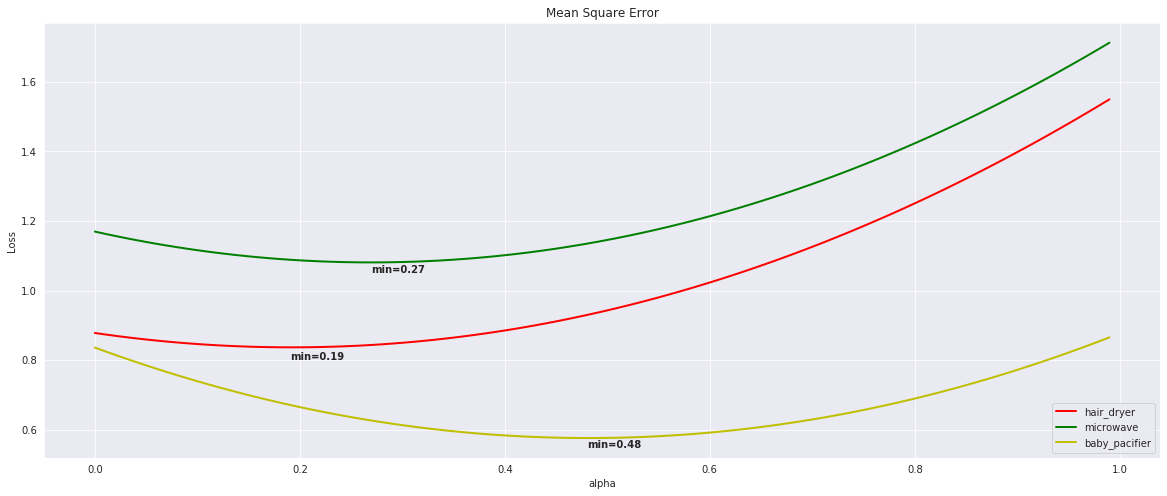

In [208]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
plt.plot(alpha, loss_hair, 'r-', lw=2, label='hair_dryer')
plt.plot(alpha, loss_micro, 'g-', lw=2, label='microwave')
plt.plot(alpha, loss_baby, 'y-', lw=2, label='baby_pacifier')
# plt.yticks(np.array([0:1:0.1]))
plt.legend(loc='lower right')
plt.xlabel('alpha')
plt.ylabel('Loss')
plt.annotate('min=0.19', xy=(0.19, 0.8), weight = 'semibold')
plt.annotate('min=0.27', xy=(0.27, 1.05), weight = 'semibold')
plt.annotate('min=0.48', xy=(0.48, 0.55), weight = 'semibold')
plt.title('Mean Square Error')
plt.savefig('alpha_loss')

In [0]:
hair["final_score"] = 0.19 * hair["star_rating"] + 0.81 * hair["text_score"]
micro["final_score"] = 0.27 * micro["star_rating"] + 0.73 * micro["text_score"]
baby["final_score"] = 0.48 * baby["star_rating"] + 0.52 * baby["text_score"]

In [186]:
hair.head(40)

,yy,mm,dd,product_parent,star_rating,helpful_votes,total_votes,clean,max_votes,score_weight,real_score,text_score,final_score
0,2008,1,1,201,5,7,8,simply best blow dryer market best standard bl...,8,0.888889,4.336735,4.7110,4.765910
1,2008,7,17,201,5,6,6,power packed dryer dryer gets job done want dr...,8,0.777778,4.336735,4.8786,4.901666
2,2008,8,25,201,5,1,1,great product arrived promptly packaged well w...,8,0.222222,4.336735,4.9808,4.984448
3,2009,8,16,201,5,0,0,finally arrived hair drier described price rea...,8,0.111111,4.336735,4.7374,4.787294
4,2010,2,7,201,5,0,0,beats heck rotary hair dryers bought wife long...,8,0.111111,4.336735,4.5928,4.670168
5,2010,10,2,201,4,1,2,simple solid excellent hair dryer bought old c...,8,0.222222,4.336735,4.9192,4.744552
6,2011,4,13,201,5,1,1,awesome first saw product hairdresser salon bl...,8,0.222222,4.336735,4.9388,4.950428
7,2011,4,23,201,5,0,0,best hair dryer ever hair dryer shaved 1 1 2 h...,8,0.111111,4.336735,4.8546,4.882226
8,2011,7,24,201,5,2,2,conair pro yellowbird professional hair dryer ...,8,0.333333,4.336735,4.9494,4.959014
9,2011,8,10,201,5,3,3,yellowbird truth sooo glad bought blow dryer g...,8,0.444444,4.336735,4.9116,4.928396
